In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from Classification import Classification
from Ensemble import Ensemble

In [2]:
sns.set_context('poster')

In [3]:
x_train = pd.read_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/x_train_data.csv')
y_train = pd.read_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/y_train_data.csv')

In [5]:
x_test = pd.read_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/x_test_data.csv')
y_test = pd.read_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/y_test_data.csv')

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3196, 157)
(3196, 1)
(799, 157)
(799, 1)


In [7]:
df = pd.read_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/4.all_models.csv')

# Best Model Selection

I focused on 3 factors of defining a good model:

1.Good Validation Accuracy
2.Good Training Accuracy
3.Small Difference between Training and Validation Accuracy

In [8]:
df

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.600751,0.550688,0.050063
1,Random Forest,0.855653,0.720901,0.134752
2,Logistic Regression,0.836462,0.743429,0.093033
3,SVM,0.743012,0.678348,0.064664
4,Naive Bayes,0.674176,0.607009,0.067167
5,KNN,0.476846,0.458073,0.018773
6,AdaBoost,0.633709,0.589487,0.044222
7,XGBoost,0.992073,0.884856,0.107217
8,Voting,0.828536,0.737171,0.091364
9,Stacking,0.840217,0.750939,0.089278


In [26]:
best_model = pickle.load(open('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/Models/XGBoost.pkl','rb'))

# Best Model Tested

In [27]:
best_model.get_test_scores(x_test,y_test)


,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,XGBoost,0.992073,0.887359,0.104714


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [28]:
from sklearn.metrics import classification_report


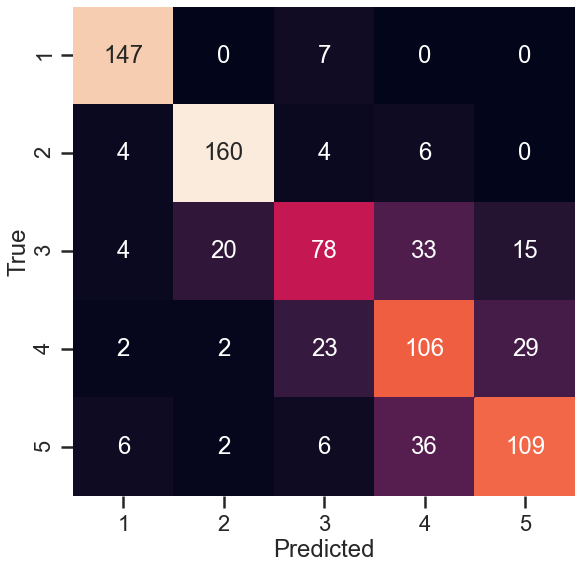

In [21]:
best_model.conf_matrix()

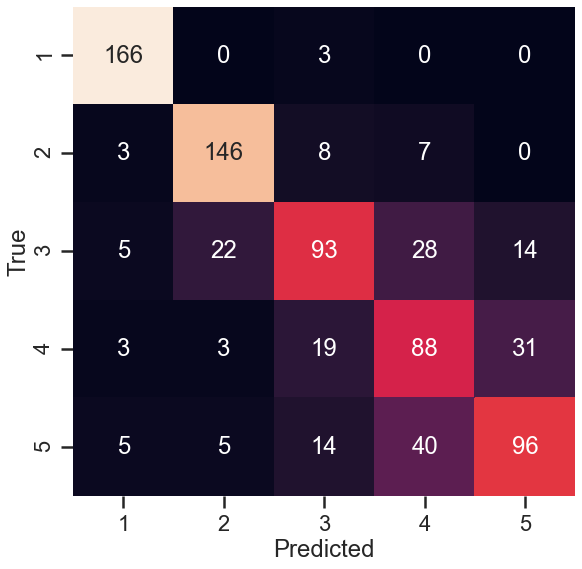

In [22]:
best_model.test_conf_matrix()

The adjacent squares of the diagonal going across the confusion matrix, shows that the model's second highest prediction, for a given class (review score) is always a review score that is +- the true score.

Very few reviews that have a score of 5, have been predicted to have a score of 1 or 2. 
This is very relieving to know, the majority of the error for the model, is no different to the error a human may make
classifying a review to a score with a scale of 1-5.

# Application Deployability

# Deployability?

most errors were near misses (e.g. 5 predicted as 4)
extreme scores (1 and 5) were relatively accurate
comparable to human prediction
reusable and consistent

Applying this model will address the problem of not having a full understanding of public opinion of our hotel.
We can apply this to new sources for opinions on our hotel and yield more feedback then we did had before.

# Future Improvements

# Model using neural networks - see if better accuracy can be achieved
Create a working application to test new reviews written by people
Try a different pre-processing approach and see if model performances change
Bring in new sources of data to see if there are significant differences on frequent words used